C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (KMeans): 0.36
Silhouette Score (Hierarchical): 0.32


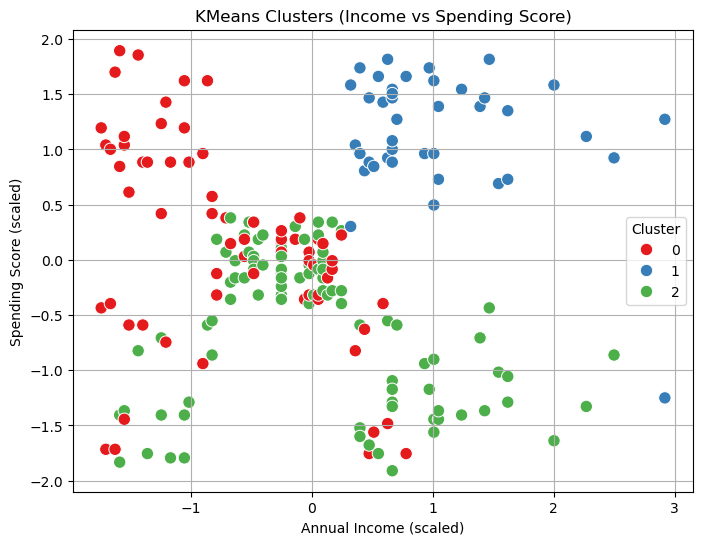

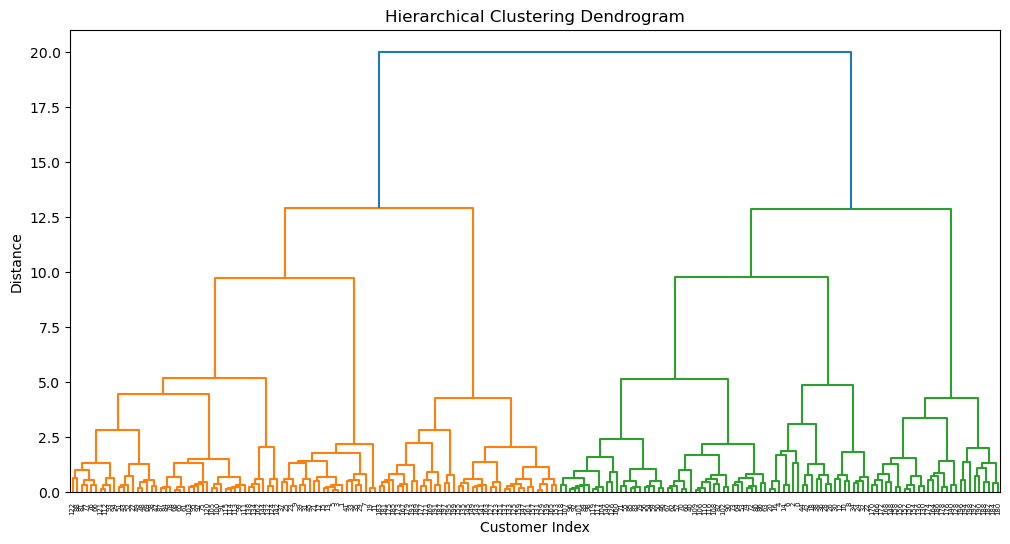

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

df = pd.read_csv("C:\\Users\\Dharani Ravi\\Downloads\\kmeans\\Mall_Customers.csv") 
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)
linked = linkage(scaled_features, method='ward')
df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

sil_kmeans = silhouette_score(scaled_features, df['KMeans_Cluster'])
sil_hier = silhouette_score(scaled_features, df['Hierarchical_Cluster'])

print(f"Silhouette Score (KMeans): {sil_kmeans:.2f}")
print(f"Silhouette Score (Hierarchical): {sil_hier:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 1], y=scaled_features[:, 2],
    hue=df['KMeans_Cluster'], palette='Set1', s=80
)
plt.title("KMeans Clusters (Income vs Spending Score)")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster")
plt.grid(True)
plt.savefig("D:\\customers\\kmeans_clusters.png")
plt.show()

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.savefig("D:\\customers\\dendrogram.png")
plt.show()

df.to_csv("D:\\customers\\clustered_customers.csv", index=False)
